In [6]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import math as m
import matplotlib.pyplot as plt

# Cхема "Крест"


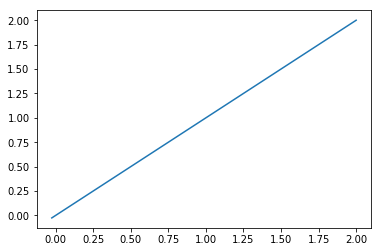

In [7]:
'''
Задаю N и М 
Также считаю шаги по времени и координате, с введением фиктивных узлов на левой границе 
для аппроксимации условия Неймана со 2м порядком'''
N =40
M =  50
tau = 1/M
h = 2/(N-0.5)
'''
Создаю массив координты, времени и численного решения'''
x = np.arange(-h/2,2+h,h)
t = np.arange(0,1+tau,tau)
y = np.zeros((M+1,N+1))
'''
Заполняю Начальные и Граничные условия на 0 и 1 временном слое'''
for i in range(1,N):
    y[0,i] = 3-x[i] + m.cos(3*m.pi*x[i]/4)
    y[1,i] = y[0,i] - tau**2/2*(3*m.pi/4)**2 * m.cos(3*m.pi*x[i]/4)          #Порядок 2й
y[0,0] = y[0,1]+h                      #Нейман был аппроксимирован фиктивными узлами с порядком 2
y[0,N] = 1                          #Условие Дирихле абсолютно точное
y[1,0] = y[1,1]+h
y[1,N] = 1
'''
Выполняю цикл для каждого временного слоя, начиная со 2-го с заполнением граничных условий'''
for j in range(1,M):
    for i in range(1,N):
        y[j+1,i] = tau**2*(y[j,i+1]-2*y[j,i]+y[j,i-1])/h**2 +tau**2*m.sin(t[j])*m.cos(m.pi*x[i]/4) +2*y[j,i] - y[j-1,i]
    y[j+1,0] = y[j+1,1]+h
    y[j+1,N] = 1
'''
Построение графика'''
fig = go.Figure(data=[go.Surface(z=y, x=x, y=t)])
fig.update_layout(title='Numerical Solution', autosize = True,height = 800,scene = dict(
                     xaxis_title='X', yaxis_title='T', zaxis_title='Y'),)
fig.show()

plt.plot(x,x)

In [4]:
'''
Создание и заполнение массивов аналитического решения и ошибки.'''
u = np.zeros((M+1,N+1))
err = np.zeros((M+1,N+1))
for i in range(N+1):
    for j in range(M+1):
        
        u[j,i] = 3-x[i] + (16*m.pi*m.sin(t[j]) - 64*m.sin(m.pi*t[j]/4))/(m.pi**3 - 16*m.pi)*m.cos(
                                            m.pi*x[i]/4)+m.cos(3*m.pi*t[j]/4)*m.cos(3*m.pi*x[i]/4)
        
        err[j,i] = y[j,i] - u[j,i]

fig_real = go.Figure(data=[go.Surface(z=u, x=x, y=t)])
fig_real.update_layout(title='Analytic Solution', autosize = True,height = 800,scene = dict(
                     xaxis_title='X', yaxis_title='T', zaxis_title='U'),)
fig_err = go.Figure(data=[go.Surface(z=err, x=x, y=t)])
fig_err.update_layout(title='Error plot', autosize = True,height = 800,scene = dict(
                     xaxis_title='X', yaxis_title='T', zaxis_title='err'),)
fig_real.show()
fig_err.show()